In [8]:
from collections import deque
from itertools import *
from pprint import pprint
from typing import *
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
class Solution:
    def allPathsSourceTarget_from1048(self, graph: List[List[int]]) -> List[List[int]]:
        def chain(vertex):
            stack = []
            stack.append([vertex])
            while stack:
                children = graph[stack[-1][-1]]
                if children:
                    stack.append(list(children))
                else:
                    # dump last element of entire stack, and then back up to next available branch
                    c = [s[-1] for s in stack]
                    yield c
                    while stack:
                        if len(stack[-1]) > 1:
                            stack[-1].pop()
                            break
                        else:
                            stack.pop()
        return list(chain(0))

    def allPathsSourceTarget_helpFromOfficialBacktrackingSolution(self, graph: List[List[int]]) -> List[List[int]]:
        target = len(graph) - 1
        results = []

        def backtrack(curr_node, path):
            if curr_node == target:
                results.append(list(path))
                return
            for next_node in graph[curr_node]:
                path.append(next_node)
                backtrack(next_node, path)
                path.pop()

        path = deque([0])
        backtrack(0, path)

        return results


In [5]:
TEST_CALL = Solution().allPathsSourceTarget_helpFromOfficialBacktrackingSolution
CASES = (
    # ## expected, *input_args
    ([[0,1,3],[0,2,3]], [[1,2],[3],[3],[]]),
    ([[0,4],[0,3,4],[0,1,3,4],[0,1,2,3,4],[0,1,4]], [[4,3,1],[3,2,4],[3],[4],[]]),
    (
        [[0,3,6,7],[0,3,4,7],[0,3,4,6,7],[0,3,4,5,6,7],[0,1,4,7],[0,1,4,6,7],[0,1,4,5,6,7],[0,1,6,7],[0,1,7],[0,1,2,4,7],[0,1,2,4,6,7],[0,1,2,4,5,6,7],[0,1,2,6,7],[0,1,2,3,6,7],[0,1,2,3,4,7],[0,1,2,3,4,6,7],[0,1,2,3,4,5,6,7],[0,1,5,6,7]],
        [[3,1],[4,6,7,2,5],[4,6,3],[6,4],[7,6,5],[6],[7],[]],
    ),
    (
        [[0,4],[0,3,4],[0,1,3,4],[0,1,4]],
        [[4,3,1],[3,2,4],[],[4],[]],
    ),
)
def test(*test_nums):
    cases = test_nums and [CASES[num] for num in test_nums] or CASES

    failed = 0
    for q, (expected, *input_args) in enumerate(cases):
        result = TEST_CALL(*input_args)
        pprint(result)
        result = list(sorted(set(map(tuple, result))))
        expected = list(sorted(set(map(tuple, expected))))

        if result == expected:
            print(f"{q}: passed")
        else:
            print(f"{q}: FAILED")
            failed += 1
        print(input_args[0])
        print("  {0:^25}    {1:^25}".format("expected:", "result:"))
        print("\n".join(f"  {str(e):>25}    {str(r):>25}" for e, r in zip_longest(expected, result)))

    if failed:
        print(f"FAILED: {failed}")
    else:
        print(f"SUCCESS: TESTS PASSED == {len(cases)}")

In [7]:
test(0)

[[0, 1, 3], [0, 2, 3]]
0: passed
[[1, 2], [3], [3], []]
          expected:                     result:         
                  (0, 1, 3)                    (0, 1, 3)
                  (0, 2, 3)                    (0, 2, 3)
SUCCESS: TESTS PASSED == 1


[[4, 3, 1], [3, 2, 4], [], [4], []]
(0, 4)
(0, 3)
(0, 1)
(1, 3)
(1, 2)
(1, 4)
(3, 4)


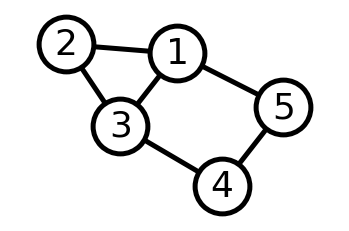

In [16]:
graph3 = CASES[3][1]
print(graph3)

G2 = nx.Graph()
for node, edges in enumerate(graph3):
    for edge in edges:
        print((node, edge))
        G2.add_edge(node, edge)

# # explicitly set positions
# pos = {1: (0, 0), 2: (-1, 0.3), 3: (2, 0.17), 4: (4, 0.255), 5: (5, 0.03)}

options = {
    "font_size": 36,
    "node_size": 3000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5,
}
nx.draw_networkx(G, **options)  # pos, 

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

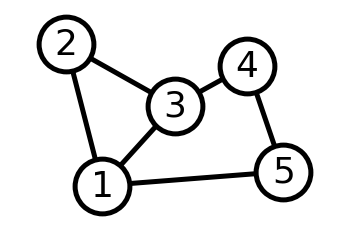

In [9]:

G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 5)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 5)

# explicitly set positions
pos = {1: (0, 0), 2: (-1, 0.3), 3: (2, 0.17), 4: (4, 0.255), 5: (5, 0.03)}

options = {
    "font_size": 36,
    "node_size": 3000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5,
}
nx.draw_networkx(G, pos, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()